In [1]:
# for manipulations
import numpy as np
import pandas as pd
from scipy import stats

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Importing data
data = pd.read_csv("Crop_Recommendation.csv")
print(data.shape)

(2200, 8)


In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,NaN,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,NaN,242.864034,rice
4,78,42,42,NaN,81.604873,7.628473,262.717340,rice


# Handling Missing values

In [4]:
data.isnull().sum()

N                0
P                0
K                0
temperature    237
humidity       202
ph              35
rainfall       145
label            0
dtype: int64

<AxesSubplot:>

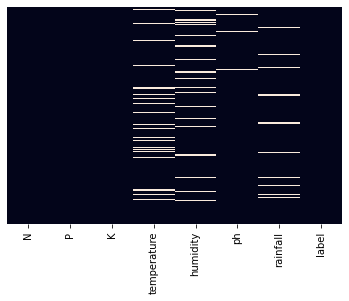

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [6]:
data['temperature'].fillna(data['temperature'].mean(), inplace=True)
data['rainfall'].fillna(data['rainfall'].mean(), inplace=True)
data['ph'].fillna(data['ph'].mean(), inplace=True)
data['humidity'].fillna(data['humidity'].mean(), inplace=True)

<AxesSubplot:>

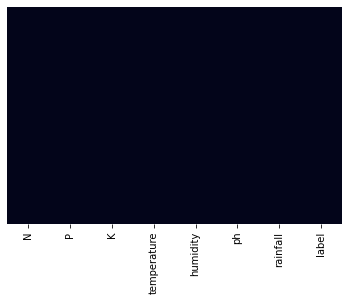

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [8]:
data['label'].value_counts()

apple          100
pigeonpeas     100
watermelon     100
blackgram      100
mungbean       100
coffee         100
cotton         100
lentil         100
mothbeans      100
kidneybeans    100
jute           100
maize          100
mango          100
muskmelon      100
papaya         100
grapes         100
rice           100
chickpea       100
banana         100
pomegranate    100
coconut        100
orange         100
Name: label, dtype: int64

In [9]:
df=data

# Cheking Skewness and data distrubution of attributes

## Nitrogen

<AxesSubplot:xlabel='N'>

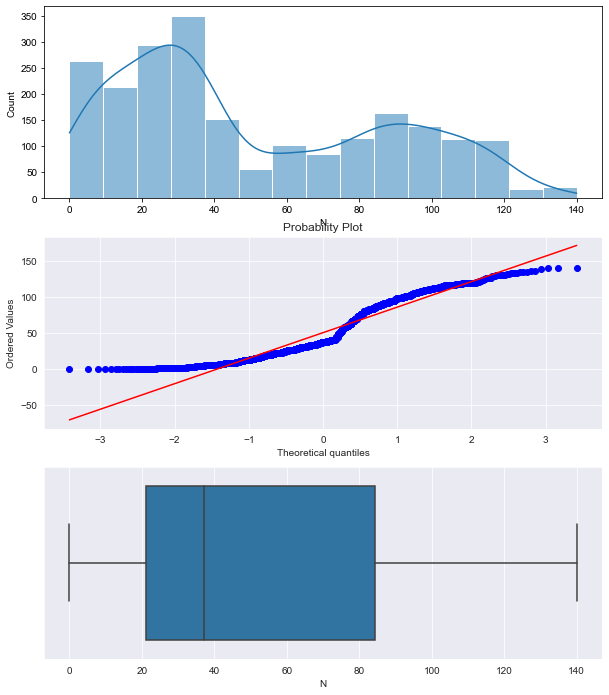

In [10]:

fig=plt.figure(figsize=(10,12))
fig.tight_layout()
ax1 = fig.add_subplot(3, 1, 1)
sns.set_style("darkgrid")

#histplot
sns.histplot(data.loc[:, 'N'],kde=True,ax=ax1)

#probplot
ax2 = fig.add_subplot(3, 1, 2)
stats.probplot(data.loc[:,'N'],plot=ax2)

#boxplot
ax3 = fig.add_subplot(3, 1, 3)
sns.boxplot(x=data.loc[:, 'N'],ax=ax3)

In [11]:
print("Skewness of the N is", data['N'].skew())

Skewness of the N is 0.5097213691539147


## Phosphures

<AxesSubplot:xlabel='P'>

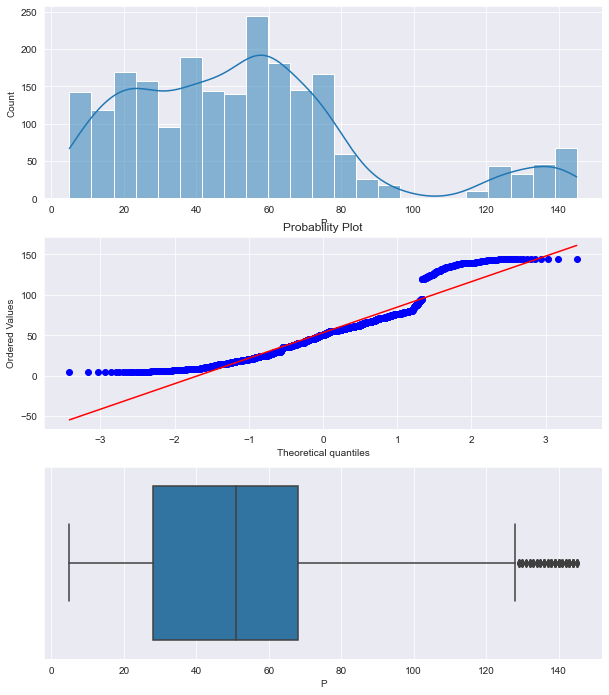

In [12]:
fig=plt.figure(figsize=(10,12))
fig.tight_layout()
ax1 = fig.add_subplot(3, 1, 1)
sns.set_style("darkgrid")
sns.histplot(data.loc[:, 'P'],kde=True,ax=ax1)

ax2 = fig.add_subplot(3, 1, 2)
stats.probplot(data.loc[:,'P'],plot=ax2)

ax3 = fig.add_subplot(3, 1, 3)
sns.boxplot(x=data.loc[:, 'P'],ax=ax3)

In [13]:
print("Skewness of the P is", data['P'].skew())

Skewness of the P is 1.0107725431372674


In [14]:
data['P'],la= stats.boxcox(data['P'])
print("Skewness of the P is", data['P'].skew())

Skewness of the P is -0.02963887755415535


## Potassium

<AxesSubplot:xlabel='K'>

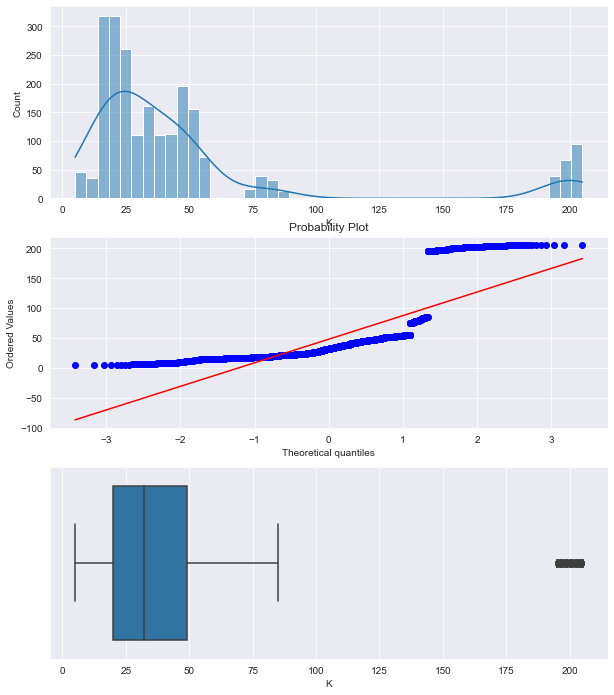

In [15]:
fig=plt.figure(figsize=(10,12))
fig.tight_layout()
ax1 = fig.add_subplot(3, 1, 1)
sns.set_style("darkgrid")
sns.histplot(data.loc[:, 'K'],kde=True,ax=ax1)

ax2 = fig.add_subplot(3, 1, 2)
stats.probplot(data.loc[:,'K'],plot=ax2)

ax3 = fig.add_subplot(3, 1, 3)
sns.boxplot(x=data.loc[:, 'K'],ax=ax3)

In [16]:
print("Skewness of the K is", data['K'].skew())

Skewness of the K is 2.3751672388547


In [17]:
data['K'],la= stats.boxcox(data['K'])
print("Skewness of the K is", data['K'].skew())

Skewness of the K is -0.03015786204471948


## Temperature

<AxesSubplot:xlabel='temperature'>

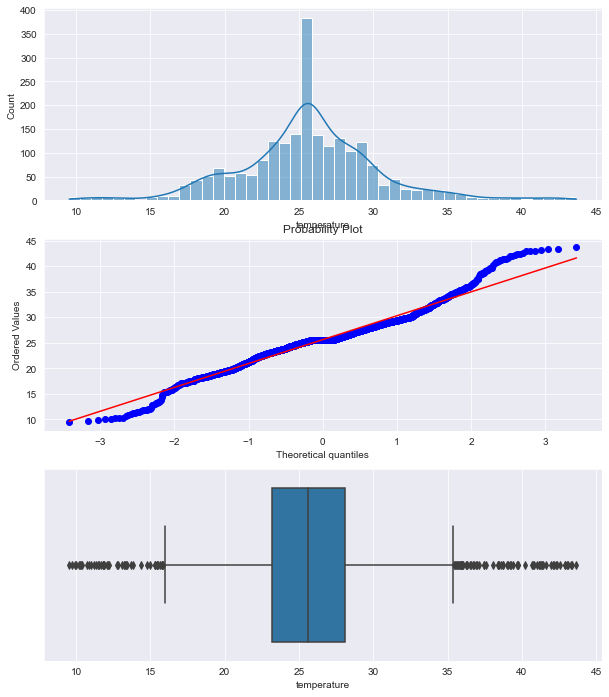

In [18]:
#temperatue
fig=plt.figure(figsize=(10,12))
fig.tight_layout()
ax1 = fig.add_subplot(3, 1, 1)
sns.set_style("darkgrid")
sns.histplot(data.loc[:, 'temperature'],kde=True,ax=ax1)

ax2 = fig.add_subplot(3, 1, 2)
stats.probplot(data.loc[:,'temperature'],plot=ax2)

ax3 = fig.add_subplot(3, 1, 3)
sns.boxplot(x=data.loc[:, 'temperature'],ax=ax3)

In [19]:
print("Skewness of the temperature is", data['temperature'].skew())

Skewness of the temperature is 0.22922002414516282


## Humidity

<AxesSubplot:xlabel='humidity'>

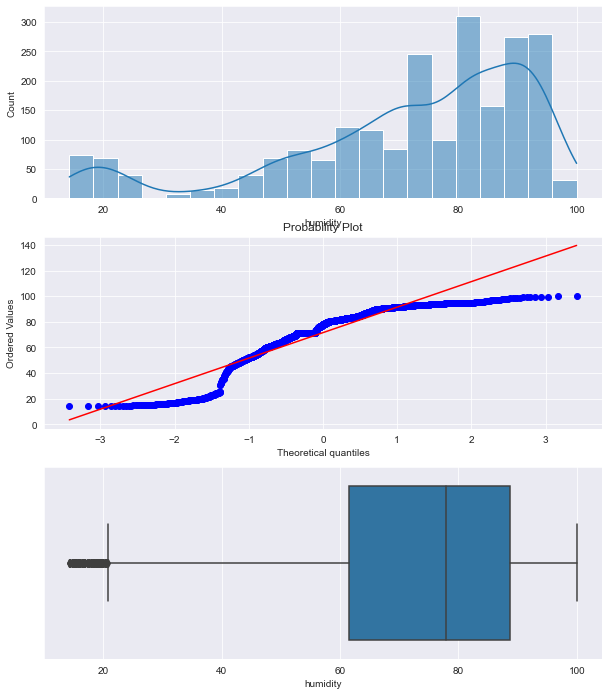

In [20]:
#humidity
fig=plt.figure(figsize=(10,12))
fig.tight_layout()
ax1 = fig.add_subplot(3, 1, 1)
sns.set_style("darkgrid")
sns.histplot(data.loc[:, 'humidity'],kde=True,ax=ax1)

ax2 = fig.add_subplot(3, 1, 2)
stats.probplot(data.loc[:,'humidity'],plot=ax2)

ax3 = fig.add_subplot(3, 1, 3)
sns.boxplot(x=data.loc[:, 'humidity'],ax=ax3)

In [21]:
print("Skewness of the humidity is", data['humidity'].skew())

Skewness of the humidity is -1.1509111636431277


## Rainfall

<AxesSubplot:xlabel='rainfall'>

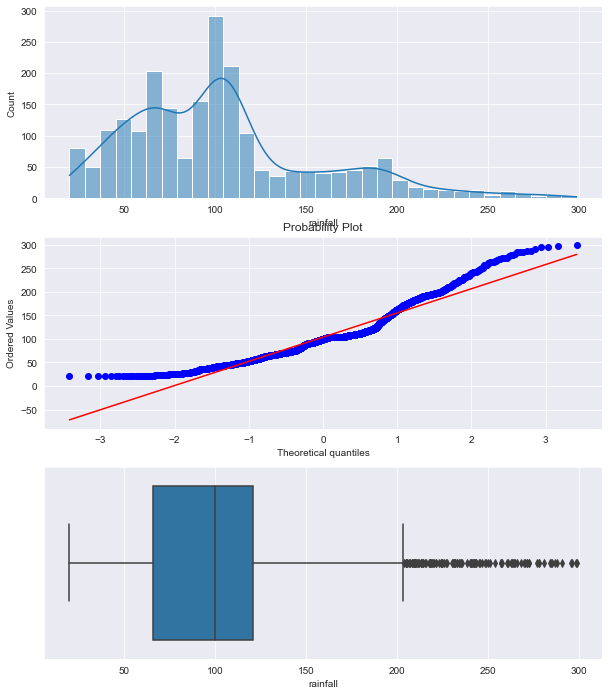

In [22]:

fig=plt.figure(figsize=(10,12))
fig.tight_layout()
ax1 = fig.add_subplot(3, 1, 1)
sns.set_style("darkgrid")
sns.histplot(data.loc[:, 'rainfall'],kde=True,ax=ax1)

ax2 = fig.add_subplot(3, 1, 2)
stats.probplot(data.loc[:,'rainfall'],plot=ax2)

ax3 = fig.add_subplot(3, 1, 3)
sns.boxplot(x=data.loc[:, 'rainfall'],ax=ax3)

In [23]:
print("Skewness of the rainfall is", data['rainfall'].skew())

Skewness of the rainfall is 0.9741539486457941


## PH

<AxesSubplot:xlabel='ph'>

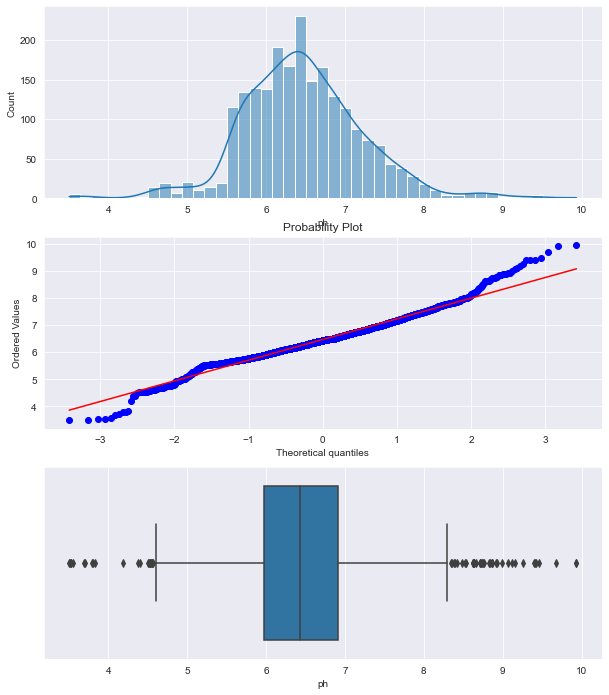

In [24]:
#ph
fig=plt.figure(figsize=(10,12))
fig.tight_layout()
ax1 = fig.add_subplot(3, 1, 1)
sns.set_style("darkgrid")
sns.histplot(data.loc[:, 'ph'],kde=True,ax=ax1)

ax2 = fig.add_subplot(3, 1, 2)
stats.probplot(data.loc[:,'ph'],plot=ax2)

ax3 = fig.add_subplot(3, 1, 3)
sns.boxplot(x=data.loc[:, 'ph'],ax=ax3)

In [25]:
print("Skewness of the ph is", data['ph'].skew())

Skewness of the ph is 0.2956523540337813


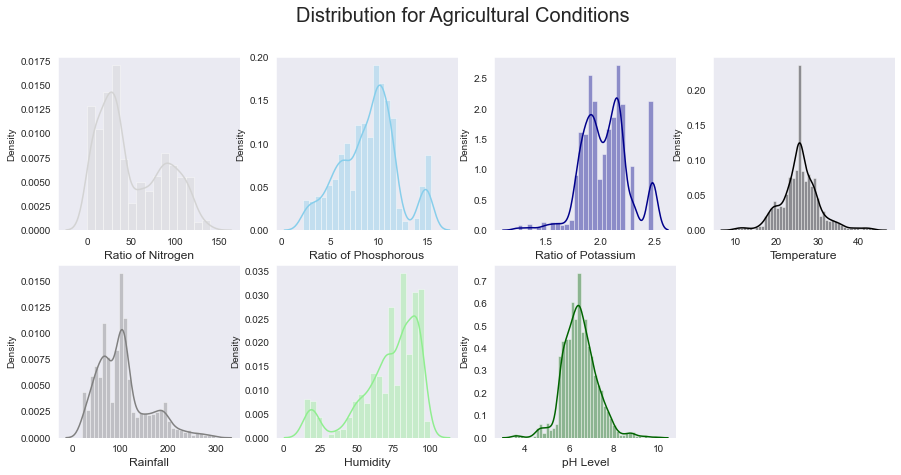

In [26]:
### Lets check the distribution of Agricultural Conditions

plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.distplot(data['N'], color = 'lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['P'], color = 'skyblue')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['K'], color ='darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['humidity'], color = 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()


In [27]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,8.473540,2.137693,20.879744,71.584617,6.502985,202.935536,rice
1,85,9.957805,2.124085,21.770462,80.319644,7.038096,226.655537,rice
2,60,9.700521,2.144184,23.004459,82.320763,7.840207,263.964248,rice
3,74,7.714341,2.116944,26.491096,80.158363,6.467553,242.864034,rice
4,78,8.473540,2.130997,25.633712,81.604873,7.628473,262.717340,rice


# Scaling

In [28]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

i=0
while i<df.shape[1]-1:
    x=df.columns[i]
    df[x]=scaler.fit_transform(df[[x]])
    i+=1

# Encoding

In [29]:

LE = LabelEncoder()
df['label'] = LE.fit_transform(df['label'])
print(LE.classes_)
print(np.sort(df['label'].unique()))
print(20*'--') 

['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
----------------------------------------


# Spliting data into training and testing

In [30]:
X = df[['N','P','K','temperature','humidity','ph','rainfall']] 
y = df['label']

# 80% for training and 20% for testing

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) 

# Decision Tree

In [56]:
# Decision Tree
tree = DecisionTreeClassifier()
# Training
tree = tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_tree)

In [79]:
accuracy_dt*100

95.45454545454545

In [57]:
cm= confusion_matrix(y_test, y_pred_tree) 

<AxesSubplot:>

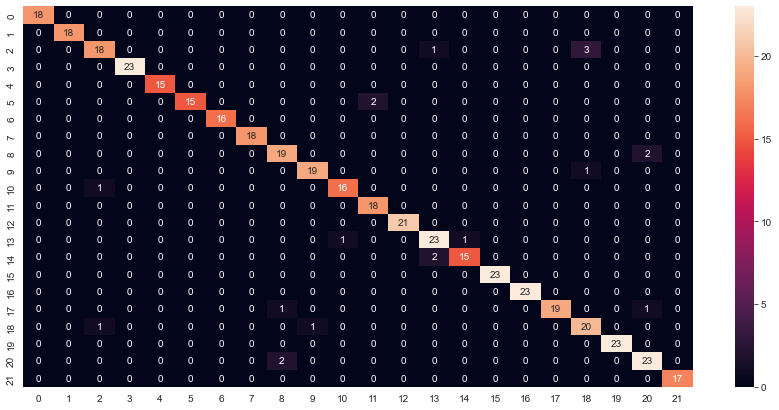

In [58]:
sns.heatmap(cm, annot=True)

# KNN

In [59]:
#KNN
model = KNeighborsClassifier(n_neighbors=10)

# Training
model.fit(X_train,y_train)



KNeighborsClassifier(n_neighbors=10)

In [60]:
y_pred = model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)

In [80]:
accuracy_knn*100

95.0

In [62]:

cpm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

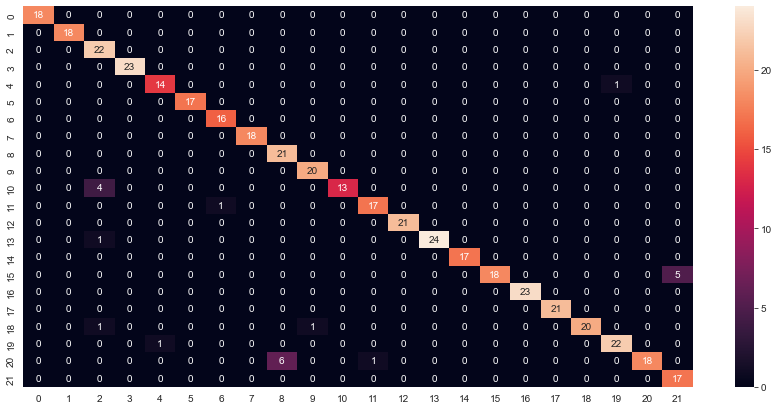

In [63]:
sns.heatmap(cpm, annot=True)

# Naive bayes

In [65]:
#naive bayes
gb = GaussianNB()

# Training
gb.fit(X_train,y_train)

GaussianNB()

In [66]:
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

In [81]:
accuracy_gb*100

97.27272727272728

In [68]:

cm_gb = confusion_matrix(y_test, y_pred_gb)

<AxesSubplot:>

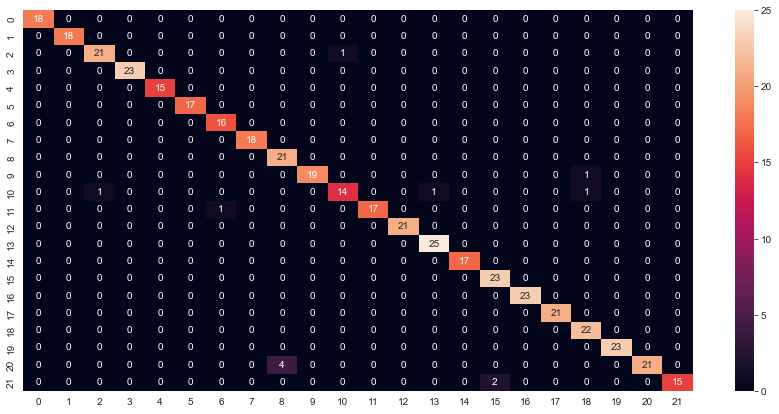

In [69]:
sns.heatmap(cm_gb, annot=True)

# SVC

In [70]:
clf = SVC(kernel='linear')
 
#Training
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [71]:
y_pred_svc = clf.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

In [82]:
accuracy_svc*100

93.18181818181817

<AxesSubplot:>

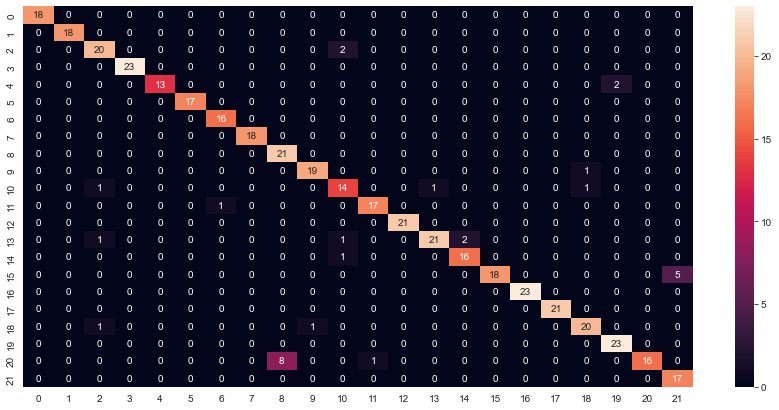

In [73]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True)

In [83]:
# Appending accuracies of all model to a dataframe
df=pd.DataFrame()
df['Model']=["DT","KNN","NB","SVC"]
df["Accuracy"]=[accuracy_dt*100,accuracy_knn*100,accuracy_gb*100,accuracy_svc*100]

# Accuracy of Models

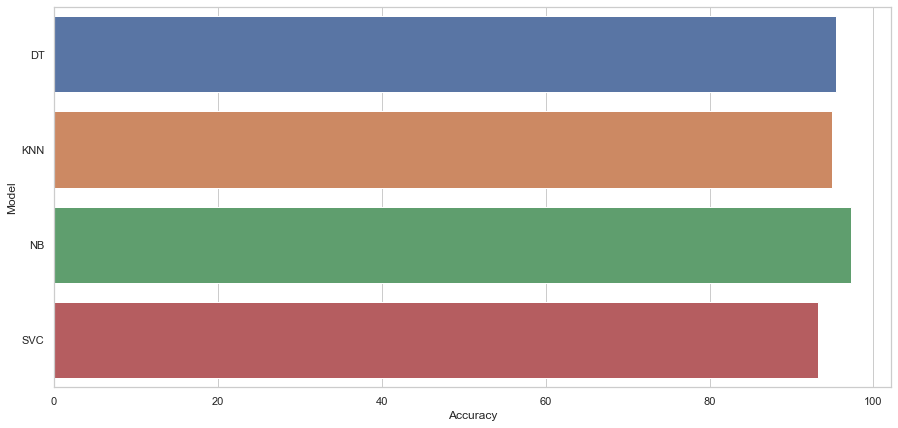

In [84]:

sns.set(style="whitegrid")
ax=sns.barplot(y='Model',x='Accuracy',data=df)